# Notebook de criação dos novos gráficos

Esse notebook tem a função de gerar os gráficos das hipoteses consideradas úteis pela equipe após a validação do parceiro.

### Instruções para uso local ou remoto (Google Colab ou VScode)

Aqui deixaremos brevemente um passo a passo para que você usuário seja capaz de executar o código localmente ou remotamente pelo seu google drive, podendo escolher a forma mais viável para seu uso e conhecimento.

##### Google Colab

1. Faça o upload do seu arquivo .ipynb para o Google Drive.
2. Abra o Google Colab em seu navegador.
3. Clique em "Arquivo" no menu superior e selecione "Abrir notebook".
4. Na guia "Upload", clique em "Procurar" e selecione o arquivo .ipynb que você enviou para o Google Drive.
5. Após selecionar o arquivo, clique em "Abrir".
6. Aguarde o carregamento do notebook no Google Colab.
7. Agora que você carregou o notebook no Google Colab, você pode fazer as alterações necessárias nos arquivos e caminhos para se adequar ao seu ambiente específico.

No notebook, a célula seguinte à essa contém as leituras dos arquivos CSV com o caminho do drive do criador desse notebook.
Comente as linhas que fazem referência aos arquivos locais e descomente as linhas que fazem referência ao Google Drive. Por exemplo:

- descomente as linhas que começam com # from google.colab import drive;
- comente as linhas que começam com tabela_Meta = pd.read_csv("./data/Cópia de BASE INTELI_META_OCUP-limpo.csv").

Certifique-se de que os arquivos CSV estejam localizados no diretório correto em seu ambiente virtual. Por exemplo, se você tiver uma pasta chamada "data" no mesmo diretório do notebook, coloque os arquivos CSV nessa pasta e ajuste seus nomes. Possivelmente os arquivos vão seguir o seguinte padrão, mesmo no seu drive:

tabela_Meta = pd.read_csv("/content/drive/MyDrive/NomeDaPastaDosArquivos/arquivo.csv)

Salve as alterações no notebook.
Agora você pode executar as células do notebook no Google Colab e as alterações nos arquivos e caminhos serão aplicadas ao seu ambiente do colab. Lembre-se de que você não precisará ter as bibliotecas necessárias instaladas em seu ambiente local para executar o código corretamente, dado que ao executar pela ferramenta do google essas dependências estarão aplicadas por padrão

##### VScode

1. Coloque os arquivos CSV dentro da pasta "data" desse notebook

No notebook, a célula seguinte à essa contém as leituras dos arquivos CSV com o caminho do drive do criador desse notebook.
Comente as linhas que fazem referência aos arquivos locais e descomente as linhas que fazem referência ao Google Drive. Por exemplo:

- descomente as linhas que começam com # from google.colab import drive;
- comente as linhas que começam com tabela_Meta = pd.read_csv("./data/Cópia de BASE INTELI_META_OCUP-limpo.csv").

Certifique-se de que os arquivos CSV estejam localizados no diretório correto em seu ambiente virtual. Por exemplo, se você tiver uma pasta chamada "data" no mesmo diretório do notebook, coloque os arquivos CSV nessa pasta e ajuste seus nomes. Possivelmente os arquivos vão seguir o seguinte padrão, mesmo no seu drive:

df_metas = pd.read_csv("./data/dados_tratados/BASE INTELI_META-limpo.csv")

Salve as alterações no notebook.
Agora você pode executar as células do notebook no VScode e as alterações nos arquivos e caminhos serão aplicadas ao seu ambiente do colab. Lembre-se de que você precisará ter as bibliotecas necessárias instaladas em seu ambiente local para executar o código corretamente:

Para fazer a instalação, basta abrir o terminal integrado e inserir o seguinte:

In [85]:
#pip install pandas numpy matplotlib

## Importação e instalação de bibliotecas

Primeiro importamos as bibliotecas necessárias para o projeto funcionar devidamente

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount('/content/drive')

## Gráficos de volume de contratos por segmento em cada mês

Na tabela "Base Dados_ProjetoINTELI_RG_01_AGOSTO_2024" existem valores nulos que atrabalham a análise das colunas, portanto, foi utilizada uma nova tabela tratada com a exclusão destes campos, possibilitando uma melhor avaliação das informações obtidas. A base de dados de agosto foi escolhida para a criação dos gráficos de contratos por segmento em cada mês pois conta com valores mais atualizados de cada um desses dados.

In [87]:
# adicione o caminho do arquivo no seu Google Drive caso use no colab
# df = pd.read_csv('/content/drive/MyDrive/Primeiro Ano/Módulo 3 - Modelo Preditivo Gazeta/tratada_BaseDados_ProjetoINTELI_RG_01_AGOSTO_2024.csv')

# caso utilize localmente, primeiramente use o comando "pip install pandas numpy" no terminal da sua máquina.
# depois, descomente o código abaixo e tudo deve funcionar, desde que os arquivos estejam na pasta "./dadosTratados/nome-do-arquivo.tipo"
df = pd.read_csv('../data/dados_tratados/tratada_BaseDados_ProjetoINTELI_RG_01_AGOSTO_2024.csv')

### Gráfico de volume de contratos por segmento em cada mês de 2020

É criado um filtro no DataFrame que separa apenas as informações de 'Segmento' e 'Mês' do ano de 2020. Após isso, são unidos os dados referentes às informações citadas para possibilitar o uso do método *.size()* , que calcula a ocorrência dos segmentos em cada mês e depois, tudo é unido em um novo DF chamado "Número de Contratos".

In [88]:
df_2020 = df[df['Ano'] == 2020]
contratos_2020 = df_2020.groupby(['Segmento', 'Mês']).size().reset_index(name='Número de Contratos')

O DF é verificado para assegurar o funcionamento do filtro no ano de 2020.

In [89]:
df_2020.head()

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,Ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,IPCA ES,IPCA BR,% Ating. Meta,Taxa Ac. TRI % PIB,CONCATENAR
9,DIGITAL,INTERNET,MUNICIPIO DE VITORIA,VT - CONTATO - VITÓRIA,SERVICOS,SERVICOS PUBLICOS,2020,1,270290.0,-255544.5,-0.945,14745.5,14745.5,0.29,0.21,1.046,"1,1",12020VT - CONTATO - VITÓRIA
11,RÁDIO,LITORAL FM,SECRETARIA COM.SOC.PRESIDENCIA REPUBLICA,RN - MERCADO NACIONAL,SERVICOS,SERVICOS PUBLICOS,2020,8,1718.5,0.0,0.000,1718.5,1718.5,-0.03,0.24,1.475,"-2,8",82020RN - MERCADO NACIONAL
14,RÁDIO,RÁDIO MIX VITÓRIA,ESPIRITO SANTENSE ALIMENTOS LTDA,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,2020,12,1300.0,0.0,0.000,1300.0,1300.0,1.41,1.35,1.251,"-3,3",122020VT - CONTATO - VITÓRIA
16,RÁDIO,GAZETA FM VITÓRIA,ESPIRITO SANTENSE ALIMENTOS LTDA,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,2020,12,500.0,0.0,0.000,500.0,500.0,1.41,1.35,1.251,"-3,3",122020VT - CONTATO - VITÓRIA
19,RÁDIO,LITORAL FM,PREFEITURA MUNICIPAL DE VILA VELHA,VT - CONTATO - VITÓRIA,SERVICOS,SERVICOS PUBLICOS,2020,7,2448.0,0.0,0.000,2448.0,2448.0,0.21,0.36,0.957,"-2,8",72020VT - CONTATO - VITÓRIA


Calcula o número de segmentos únicos no DataFrame e separa estes em quatro grupos para possibilitar a utilização de mais paletas de cores, facilitando a visualização do gráfico.

In [90]:
segmentos_unicos2020 = contratos_2020['Segmento'].unique()
num_segmentos2020 = len(segmentos_unicos2020)
separacao_cores = num_segmentos2020 // 4

Separa as cores de acordo com a divisão dos segmentos em paletas diferentes e atribui estas às linhas do gráfico.

In [91]:
cores_verde = plt.get_cmap('Greens')(np.linspace(0.5, 1, separacao_cores))
cores_vermelho = plt.get_cmap('Reds')(np.linspace(0.5, 1, separacao_cores))
cores_arcoiris = plt.get_cmap('gist_rainbow')(np.linspace(0.5, 1, separacao_cores))
cores_escuras = plt.get_cmap('Paired')(np.linspace(0.5, 1, num_segmentos2020 - 3 * separacao_cores))

cores_segmentos = {}
for i, segmento in enumerate(segmentos_unicos2020):
    if i < separacao_cores:
        cores_segmentos[segmento] = cores_verde[i]
    elif i < 2 * separacao_cores:
        cores_segmentos[segmento] = cores_vermelho[i - separacao_cores]
    elif i < 3 * separacao_cores:
        cores_segmentos[segmento] = cores_arcoiris[i - 2 * separacao_cores]
    else:
        cores_segmentos[segmento] = cores_escuras[i - 3 * separacao_cores]

Configura o tamanho do gráfico de linhas e as suas características, como suas cores, seus eixos, títulos e legendas. Por fim, o gráfico é gerado, demonstrando a quantidade de contratos assinados por segmentos em cada mês do ano de 2020.

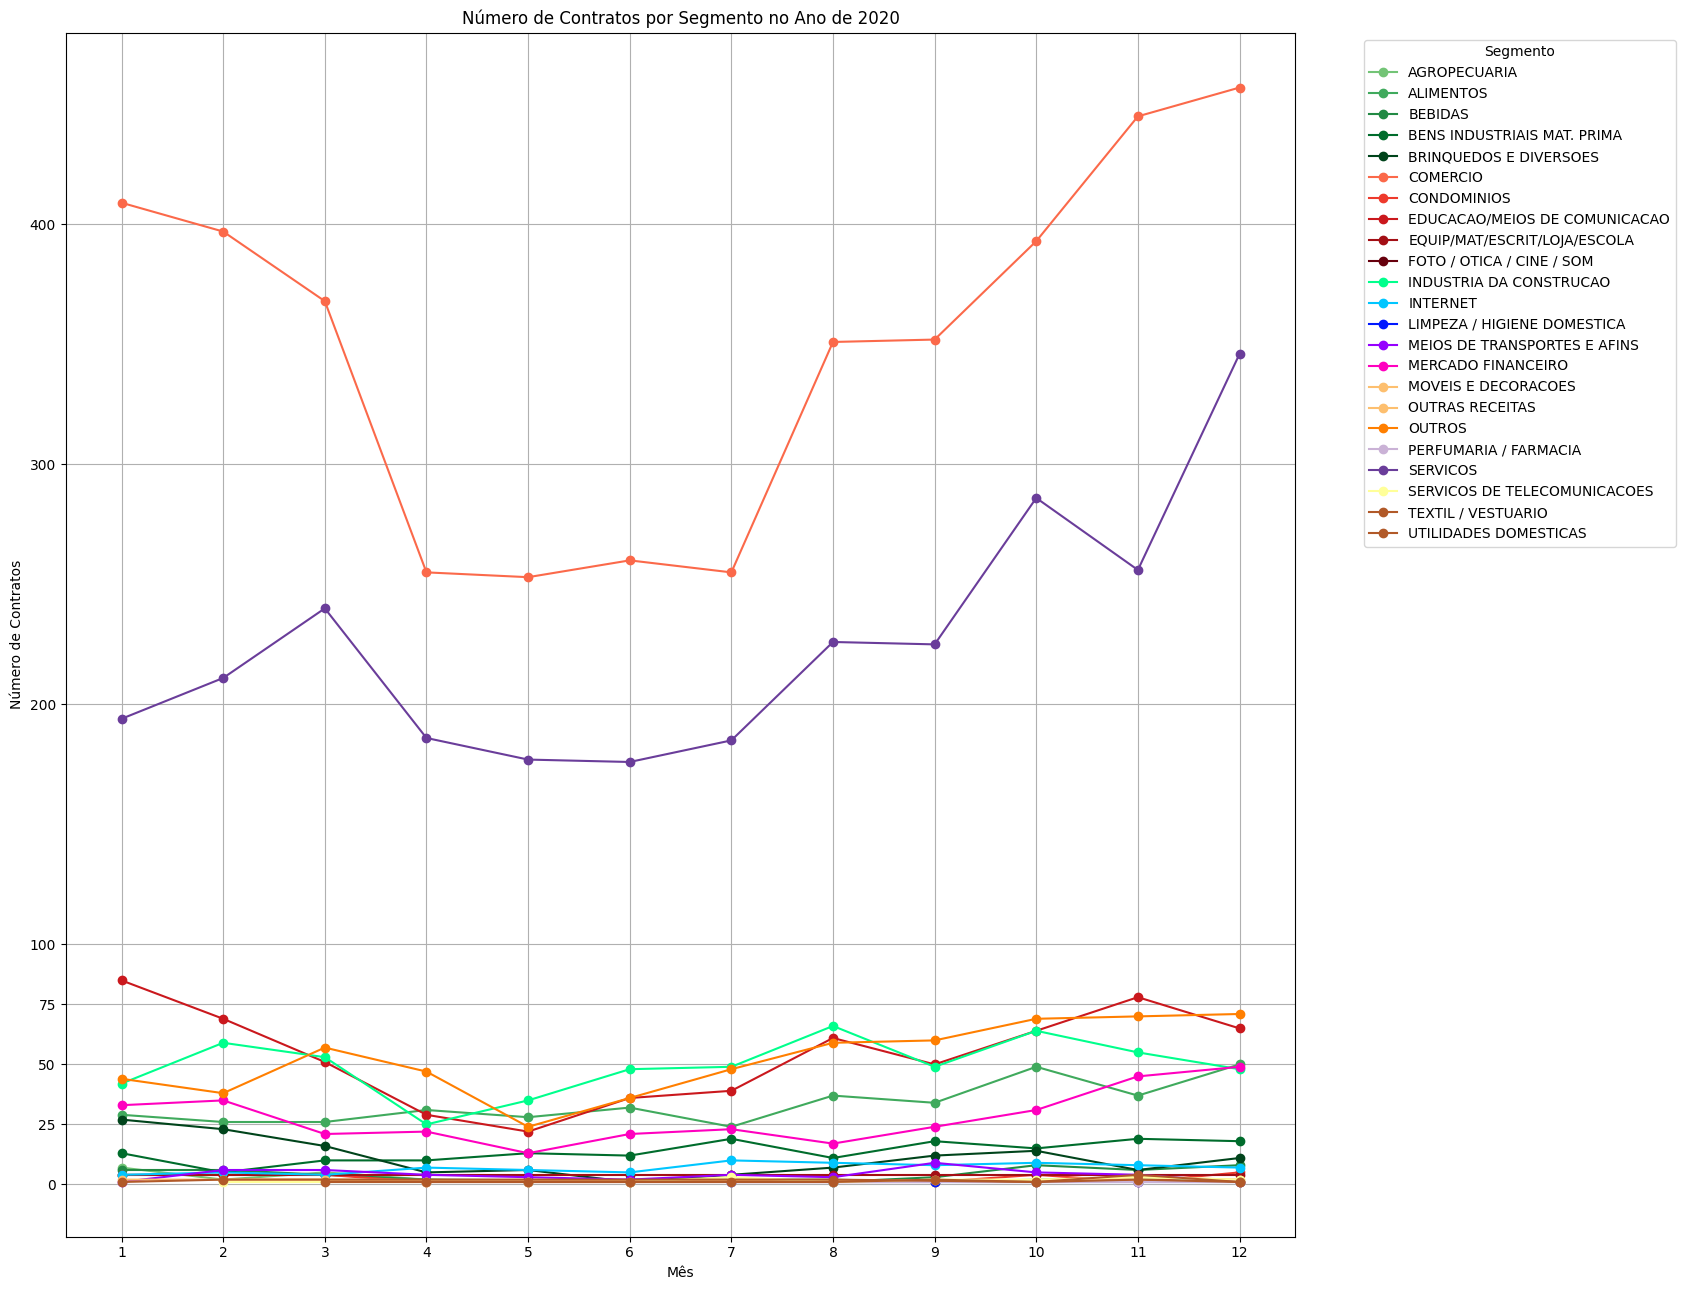

In [92]:
plt.figure(figsize=(17, 13))

for segmento, group in contratos_2020.groupby('Segmento'):
    plt.plot(
        group['Mês'],
        group['Número de Contratos'],
        marker='o',
        label=segmento,
        color=cores_segmentos[segmento]
    )

plt.title('Número de Contratos por Segmento no Ano de 2020')
plt.xlabel('Mês')
plt.ylabel('Número de Contratos')
plt.xticks(ticks=range(1, 13), labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.yticks([0, 25, 50, 75, 100, 200, 300, 400])
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Gráfico de volume de contratos por segmento em cada mês de 2021

É criado um filtro no DataFrame que separa apenas as informações de 'Segmento' e 'Mês' do ano de 2021. Após isso, são unidos os dados referentes às informações citadas para possibilitar o uso do método .size() , que calcula a ocorrência dos segmentos em cada mês e depois, tudo é unido em um novo DF chamado "Número de Contratos".

In [93]:
df_2021 = df[df['Ano'] == 2021]
contratos_2021 = df_2021.groupby(['Segmento', 'Mês']).size().reset_index(name='Número de Contratos')

O DF é verificado para assegurar o funcionamento do filtro no ano de 2021.

In [94]:
df_2021.head()

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,Ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,IPCA ES,IPCA BR,% Ating. Meta,Taxa Ac. TRI % PIB,CONCATENAR
6,TELEVISÃO,GAZETA PRODUCOES,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS,SERVICOS PUBLICOS,2021,12,11742.00,0.0,0.0,11742.00,11742.00,0.73,0.73,1.305,"4,8",122021VT - CONTATO - VITÓRIA
27,RÁDIO,GAZETA FM VITÓRIA,SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,VT - CONTATO - VITÓRIA,SERVICOS,SERVICOS PUBLICOS,2021,2,1026.00,0.0,0.0,1026.00,1026.00,1.00,0.86,1.217,"-2,9",22021VT - CONTATO - VITÓRIA
39,RÁDIO,LITORAL FM,LOJAS SIMONETTI LTDA,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,2021,11,1452.48,0.0,0.0,1452.48,1452.48,1.01,0.95,1.171,"4,8",112021VT - CONTATO - VITÓRIA
42,RÁDIO,LITORAL FM NOROESTE,BANCO DO BRASIL S/A,RN - MERCADO NACIONAL,MERCADO FINANCEIRO,BANCOS/FINANC.INSTIT,2021,3,1482.00,0.0,0.0,1482.00,1482.00,1.10,0.93,1.414,"-2,9",32021RN - MERCADO NACIONAL
44,RÁDIO,LITORAL FM NORTE,MINISTERIO DA SAUDE,RN - MERCADO NACIONAL,SERVICOS,SERVICOS PUBLICOS,2021,10,550.62,0.0,0.0,550.62,550.62,1.53,1.25,0.975,"4,8",102021RN - MERCADO NACIONAL


Calcula o número de segmentos únicos no DataFrame e separa estes em quatro grupos para possibilitar a utilização de mais paletas de cores, facilitando a visualização do gráfico.

In [95]:
segmentos_unicos2021 = contratos_2021['Segmento'].unique()
num_segmentos2021 = len(segmentos_unicos2021)
separacao_cores = num_segmentos2021 // 4

Separa as cores de acordo com a divisão dos segmentos em paletas diferentes e atribui estas às linhas do gráfico.

In [96]:
cores_verde = plt.get_cmap('Greens')(np.linspace(0.5, 1, separacao_cores))
cores_vermelho = plt.get_cmap('Reds')(np.linspace(0.5, 1, separacao_cores))
cores_arcoiris = plt.get_cmap('gist_rainbow')(np.linspace(0.5, 1, separacao_cores))
cores_escuras = plt.get_cmap('Paired')(np.linspace(0.5, 1, num_segmentos2021 - 3 * separacao_cores))

cores_segmentos = {}
for i, segmento in enumerate(segmentos_unicos2021):
    if i < separacao_cores:
        cores_segmentos[segmento] = cores_verde[i]
    elif i < 2 * separacao_cores:
        cores_segmentos[segmento] = cores_vermelho[i - separacao_cores]
    elif i < 3 * separacao_cores:
        cores_segmentos[segmento] = cores_arcoiris[i - 2 * separacao_cores]
    else:
        cores_segmentos[segmento] = cores_escuras[i - 3 * separacao_cores]

Configura o tamanho do gráfico de linhas e as suas características, como suas cores, seus eixos, títulos e legendas. Por fim, o gráfico é gerado, demonstrando a quantidade de contratos assinados por segmentos em cada mês do ano de 2021.

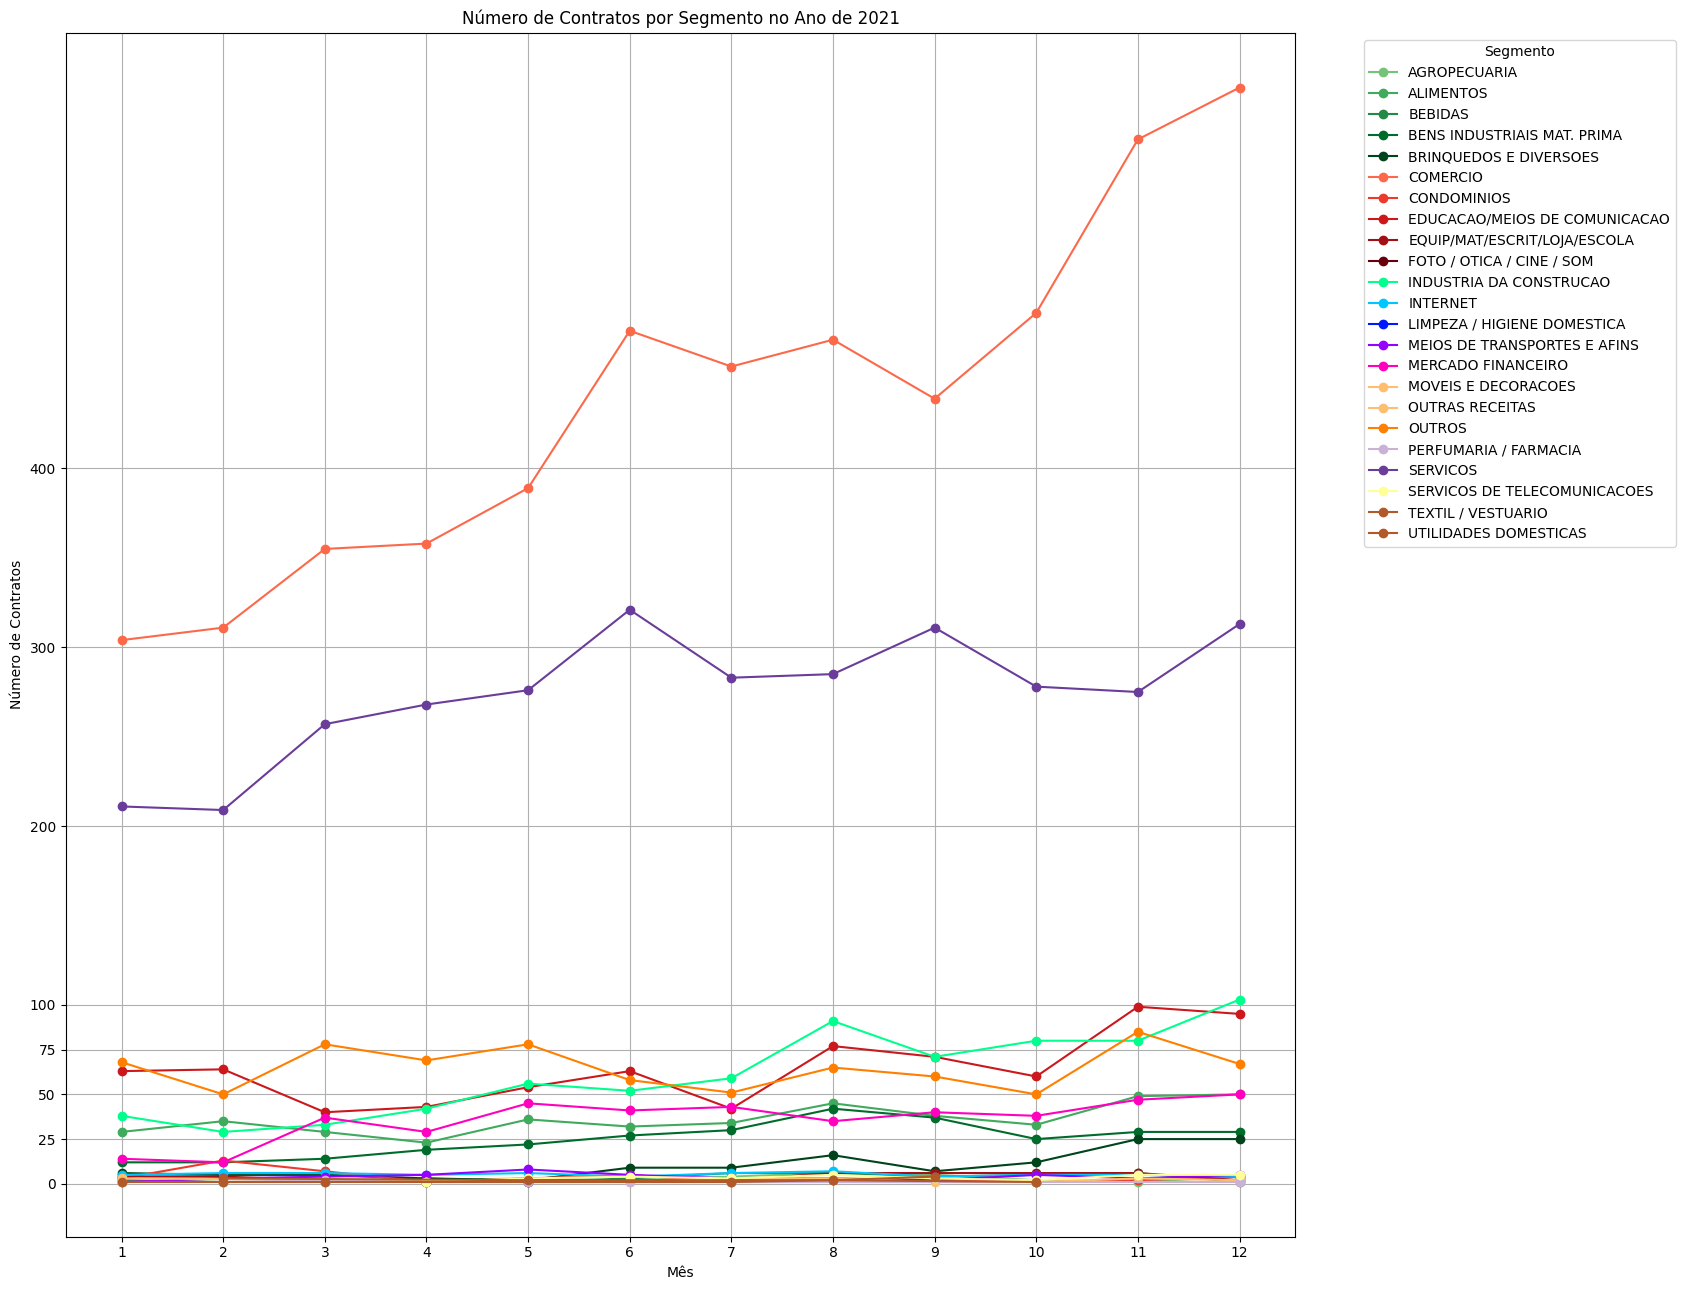

In [97]:
plt.figure(figsize=(17, 13))

for segmento, group in contratos_2021.groupby('Segmento'):
    plt.plot(
        group['Mês'],
        group['Número de Contratos'],
        marker='o',
        label=segmento,
        color=cores_segmentos[segmento]
    )

plt.title('Número de Contratos por Segmento no Ano de 2021')
plt.xlabel('Mês')
plt.ylabel('Número de Contratos')
plt.xticks(ticks=range(1, 13), labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.yticks([0, 25, 50, 75, 100, 200, 300, 400])
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Gráfico de volume de contratos por segmento em cada mês de 2022

É criado um filtro no DataFrame que separa apenas as informações de 'Segmento' e 'Mês' do ano de 2022. Após isso, são unidos os dados referentes às informações citadas para possibilitar o uso do método .size() , que calcula a ocorrência dos segmentos em cada mês e depois, tudo é unido em um novo DF chamado "Número de Contratos".

In [98]:
df_2022 = df[df['Ano'] == 2022]
contratos_2022 = df_2022.groupby(['Segmento', 'Mês']).size().reset_index(name='Número de Contratos')

O DF é verificado para assegurar o funcionamento do filtro no ano de 2022.

In [99]:
df_2022.head()

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,Ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,IPCA ES,IPCA BR,% Ating. Meta,Taxa Ac. TRI % PIB,CONCATENAR
0,TELEVISÃO,TV GAZETA,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS,SERVICOS PUBLICOS,2022,4,48120.0,0.00,0.00,48120.00,48120.00,0.83,1.06,1.408,"2,7",42022LI - CONTATO - LINHARES
1,TELEVISÃO,TV GAZETA,IAMONDE DESIGN DE MOVEIS LTDA,VT - CONTATO - VITÓRIA,SERVICOS,PREST DE SERVICOS,2022,12,14477.0,-5066.95,-0.35,9410.05,9410.05,0.65,0.62,1.058,"3,0",122022VT - CONTATO - VITÓRIA
2,TELEVISÃO,TV SUL PRODUCOES,UNIMED SUL CAPIXABA - COOPERATIVA DE TRA,CH - CONTATO - CACHOEIRO,SERVICOS,PREST DE SERVICOS,2022,4,4000.0,0.00,0.00,4000.00,4000.00,0.83,1.06,1.127,"2,7",42022CH - CONTATO - CACHOEIRO
3,TELEVISÃO,TV GAZETA,ACIMAQ EQUIPAMENTOS IND.E COMERCIO LTDA,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,2022,12,33871.0,-15239.50,-0.45,18631.50,18631.50,0.65,0.62,1.058,"3,0",122022VT - CONTATO - VITÓRIA
4,TELEVISÃO,TV GAZETA SUL,MUNICIPIO DE LINHARES,LI - CONTATO - LINHARES,SERVICOS,SERVICOS PUBLICOS,2022,4,12980.0,0.00,0.00,12980.00,12980.00,0.83,1.06,1.408,"2,7",42022LI - CONTATO - LINHARES


Calcula o número de segmentos únicos no DataFrame e separa estes em quatro grupos para possibilitar a utilização de mais paletas de cores, facilitando a visualização do gráfico.

In [100]:
segmentos_unicos2022 = contratos_2022['Segmento'].unique()
num_segmentos2022 = len(segmentos_unicos2022)
separacao_cores = num_segmentos2022 // 4

Separa as cores de acordo com a divisão dos segmentos em paletas diferentes e atribui estas às linhas do gráfico.

In [101]:
cores_verde = plt.get_cmap('Greens')(np.linspace(0.5, 1, separacao_cores))
cores_vermelho = plt.get_cmap('Reds')(np.linspace(0.5, 1, separacao_cores))
cores_arcoiris = plt.get_cmap('gist_rainbow')(np.linspace(0.5, 1, separacao_cores))
cores_escuras = plt.get_cmap('Paired')(np.linspace(0.5, 1, num_segmentos2022 - 3 * separacao_cores))

cores_segmentos = {}
for i, segmento in enumerate(segmentos_unicos2022):
    if i < separacao_cores:
        cores_segmentos[segmento] = cores_verde[i]
    elif i < 2 * separacao_cores:
        cores_segmentos[segmento] = cores_vermelho[i - separacao_cores]
    elif i < 3 * separacao_cores:
        cores_segmentos[segmento] = cores_arcoiris[i - 2 * separacao_cores]
    else:
        cores_segmentos[segmento] = cores_escuras[i - 3 * separacao_cores]

Configura o tamanho do gráfico de linhas e as suas características, como suas cores, seus eixos, títulos e legendas. Por fim, o gráfico é gerado, demonstrando a quantidade de contratos assinados por segmentos em cada mês do ano de 2022.

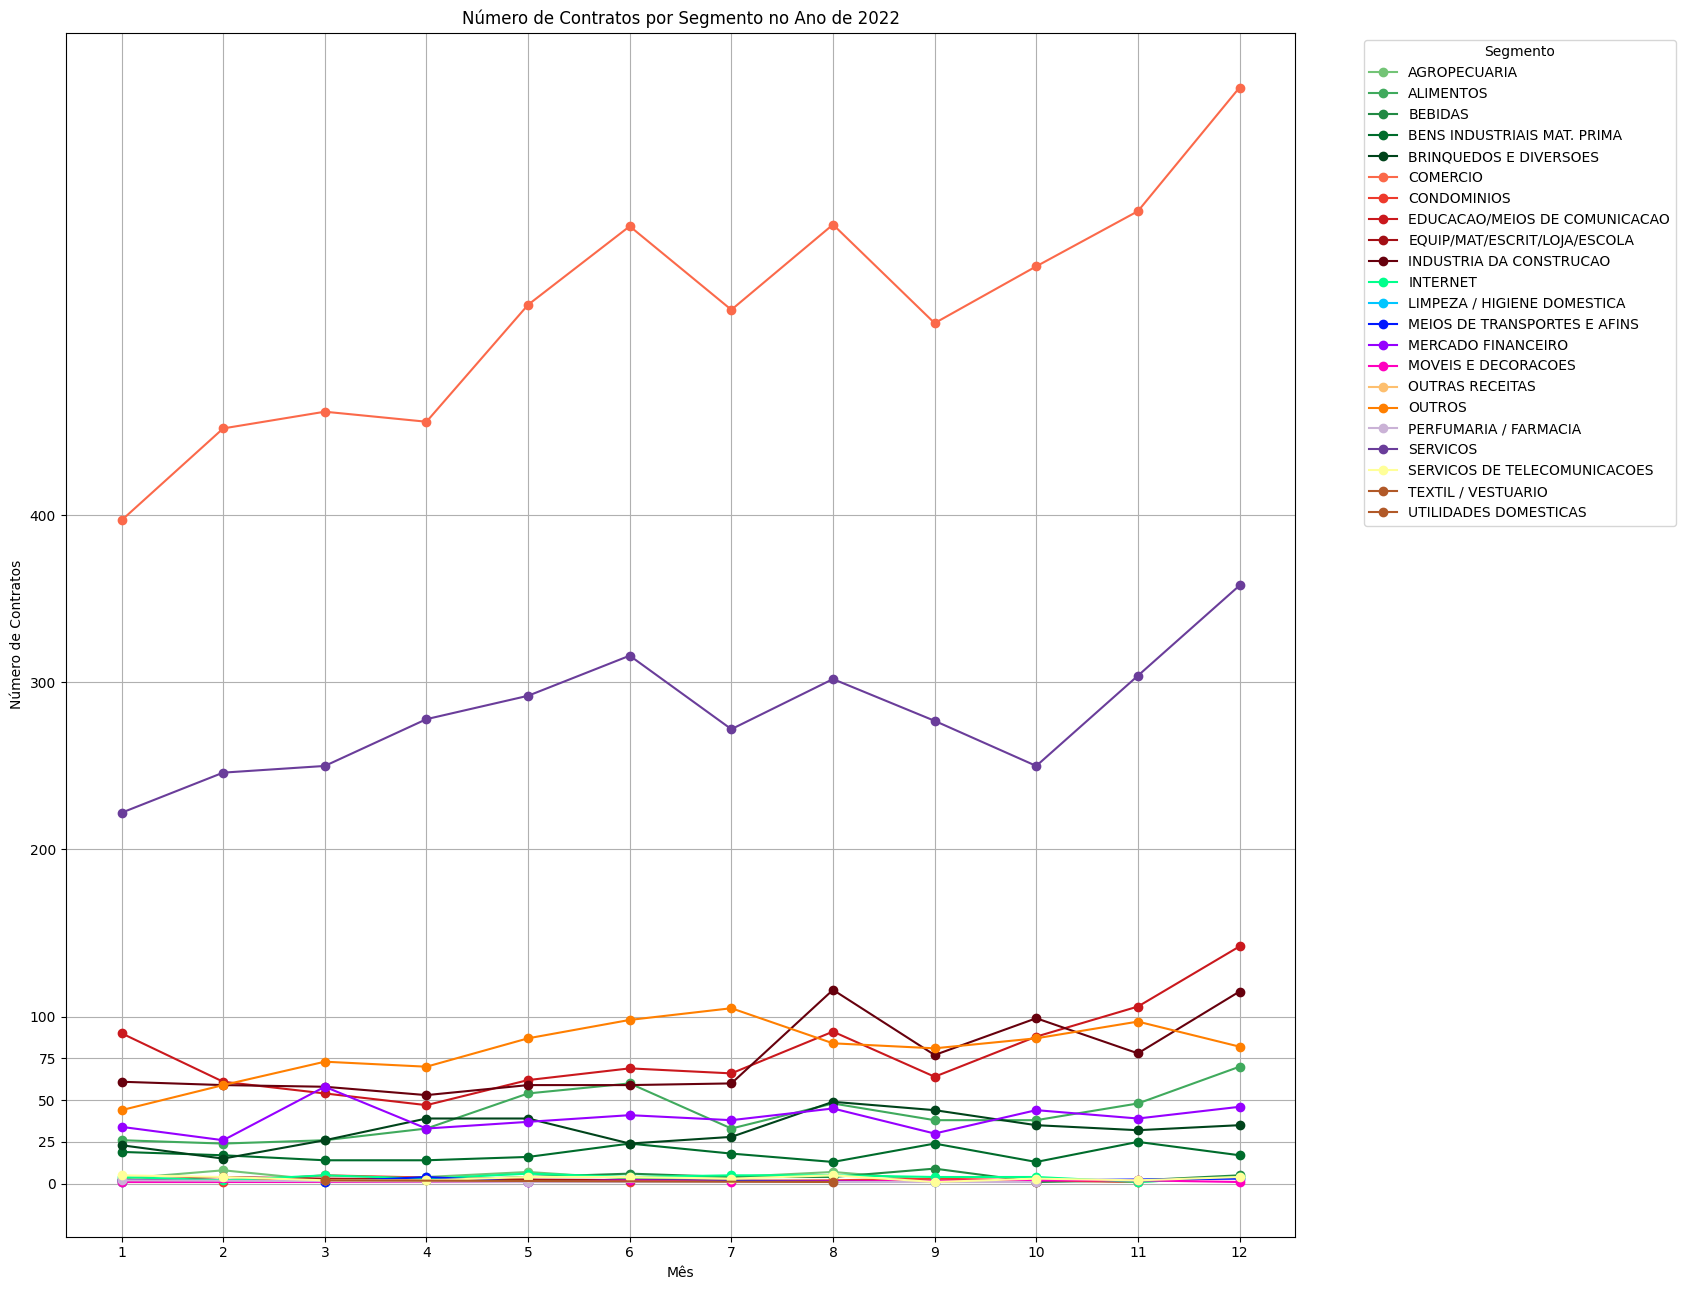

In [102]:
plt.figure(figsize=(17, 13))

for segmento, group in contratos_2022.groupby('Segmento'):
    plt.plot(
        group['Mês'],
        group['Número de Contratos'],
        marker='o',
        label=segmento,
        color=cores_segmentos[segmento]
    )

plt.title('Número de Contratos por Segmento no Ano de 2022')
plt.xlabel('Mês')
plt.ylabel('Número de Contratos')
plt.xticks(ticks=range(1, 13), labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.yticks([0, 25, 50, 75, 100, 200, 300, 400])
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Gráfico de volume de contratos por segmento em cada mês de 2023

É criado um filtro no DataFrame que separa apenas as informações de 'Segmento' e 'Mês' do ano de 2023. Após isso, são unidos os dados referentes às informações citadas para possibilitar o uso do método .size() , que calcula a ocorrência dos segmentos em cada mês e depois, tudo é unido em um novo DF chamado "Número de Contratos".

In [103]:
df_2023 = df[df['Ano'] == 2023]
contratos_2023 = df_2023.groupby(['Segmento', 'Mês']).size().reset_index(name='Número de Contratos')

O DF é verificado para assegurar o funcionamento do filtro no ano de 2023.

In [104]:
df_2023.head()

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,Ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,IPCA ES,IPCA BR,% Ating. Meta,Taxa Ac. TRI % PIB,CONCATENAR
12,DIGITAL,INTERNET,SOC EDUC DO ES UNIDADE DE VV ENSINO SUPE,VT - CONTATO - VITÓRIA,EDUCACAO/MEIOS DE COMUNICACAO,CURSO APRENDIZAGEM,2023,8,3500.00,-525.00,-0.150,2975.00,2975.00,0.31,0.23,1.150,"3,1",82023VT - CONTATO - VITÓRIA
15,RÁDIO,CBN VITORIA,PROSPCTAR COMUNICACAO LTDA,VT - CONTATO - VITÓRIA,SERVICOS,PREST DE SERVICOS,2023,8,3619.20,0.00,0.000,3619.20,3619.20,0.31,0.23,1.150,"3,1",82023VT - CONTATO - VITÓRIA
17,RÁDIO,LITORAL FM,"ASSOCIACAO ADMIN. FAIXA DE 3,5 GHZ - EAF",RN - MERCADO NACIONAL,SERVICOS,PREST DE SERVICOS,2023,4,36386.00,-24252.10,-0.667,12133.90,12133.90,0.31,0.61,0.750,"3,7",42023RN - MERCADO NACIONAL
20,DIGITAL,INTERNET,ENSINANDO TECNOLOGIA E INTERMEDIACAO LTD,VT - CONTATO - VITÓRIA,EDUCACAO/MEIOS DE COMUNICACAO,CURSO APRENDIZAGEM,2023,5,2500.00,-1250.00,-0.500,1250.00,1250.00,0.01,0.23,0.970,"3,7",52023VT - CONTATO - VITÓRIA
21,RÁDIO,LITORAL FM,MINISTERIO DA SAUDE,RN - MERCADO NACIONAL,SERVICOS,SERVICOS PUBLICOS,2023,2,6500.16,-2537.12,-0.390,3963.04,3963.04,0.92,0.84,0.923,"3,7",22023RN - MERCADO NACIONAL


Calcula o número de segmentos únicos no DataFrame e separa estes em quatro grupos para possibilitar a utilização de mais paletas de cores, facilitando a visualização do gráfico.

In [105]:
segmentos_unicos2023 = contratos_2023['Segmento'].unique()
num_segmentos2023 = len(segmentos_unicos2023)
separacao_cores = num_segmentos2023 // 4


Separa as cores de acordo com a divisão dos segmentos em paletas diferentes e atribui estas às linhas do gráfico.

In [106]:
cores_verde = plt.get_cmap('Greens')(np.linspace(0.5, 1, separacao_cores))
cores_vermelho = plt.get_cmap('Reds')(np.linspace(0.5, 1, separacao_cores))
cores_arcoiris = plt.get_cmap('gist_rainbow')(np.linspace(0.5, 1, separacao_cores))
cores_escuras = plt.get_cmap('Paired')(np.linspace(0.5, 1, num_segmentos2023 - 3 * separacao_cores))

cores_segmentos = {}
for i, segmento in enumerate(segmentos_unicos2023):
    if i < separacao_cores:
        cores_segmentos[segmento] = cores_verde[i]
    elif i < 2 * separacao_cores:
        cores_segmentos[segmento] = cores_vermelho[i - separacao_cores]
    elif i < 3 * separacao_cores:
        cores_segmentos[segmento] = cores_arcoiris[i - 2 * separacao_cores]
    else:
        cores_segmentos[segmento] = cores_escuras[i - 3 * separacao_cores]

Configura o tamanho do gráfico de linhas e as suas características, como suas cores, seus eixos, títulos e legendas. Por fim, o gráfico é gerado, demonstrando a quantidade de contratos assinados por segmentos em cada mês do ano de 2023.

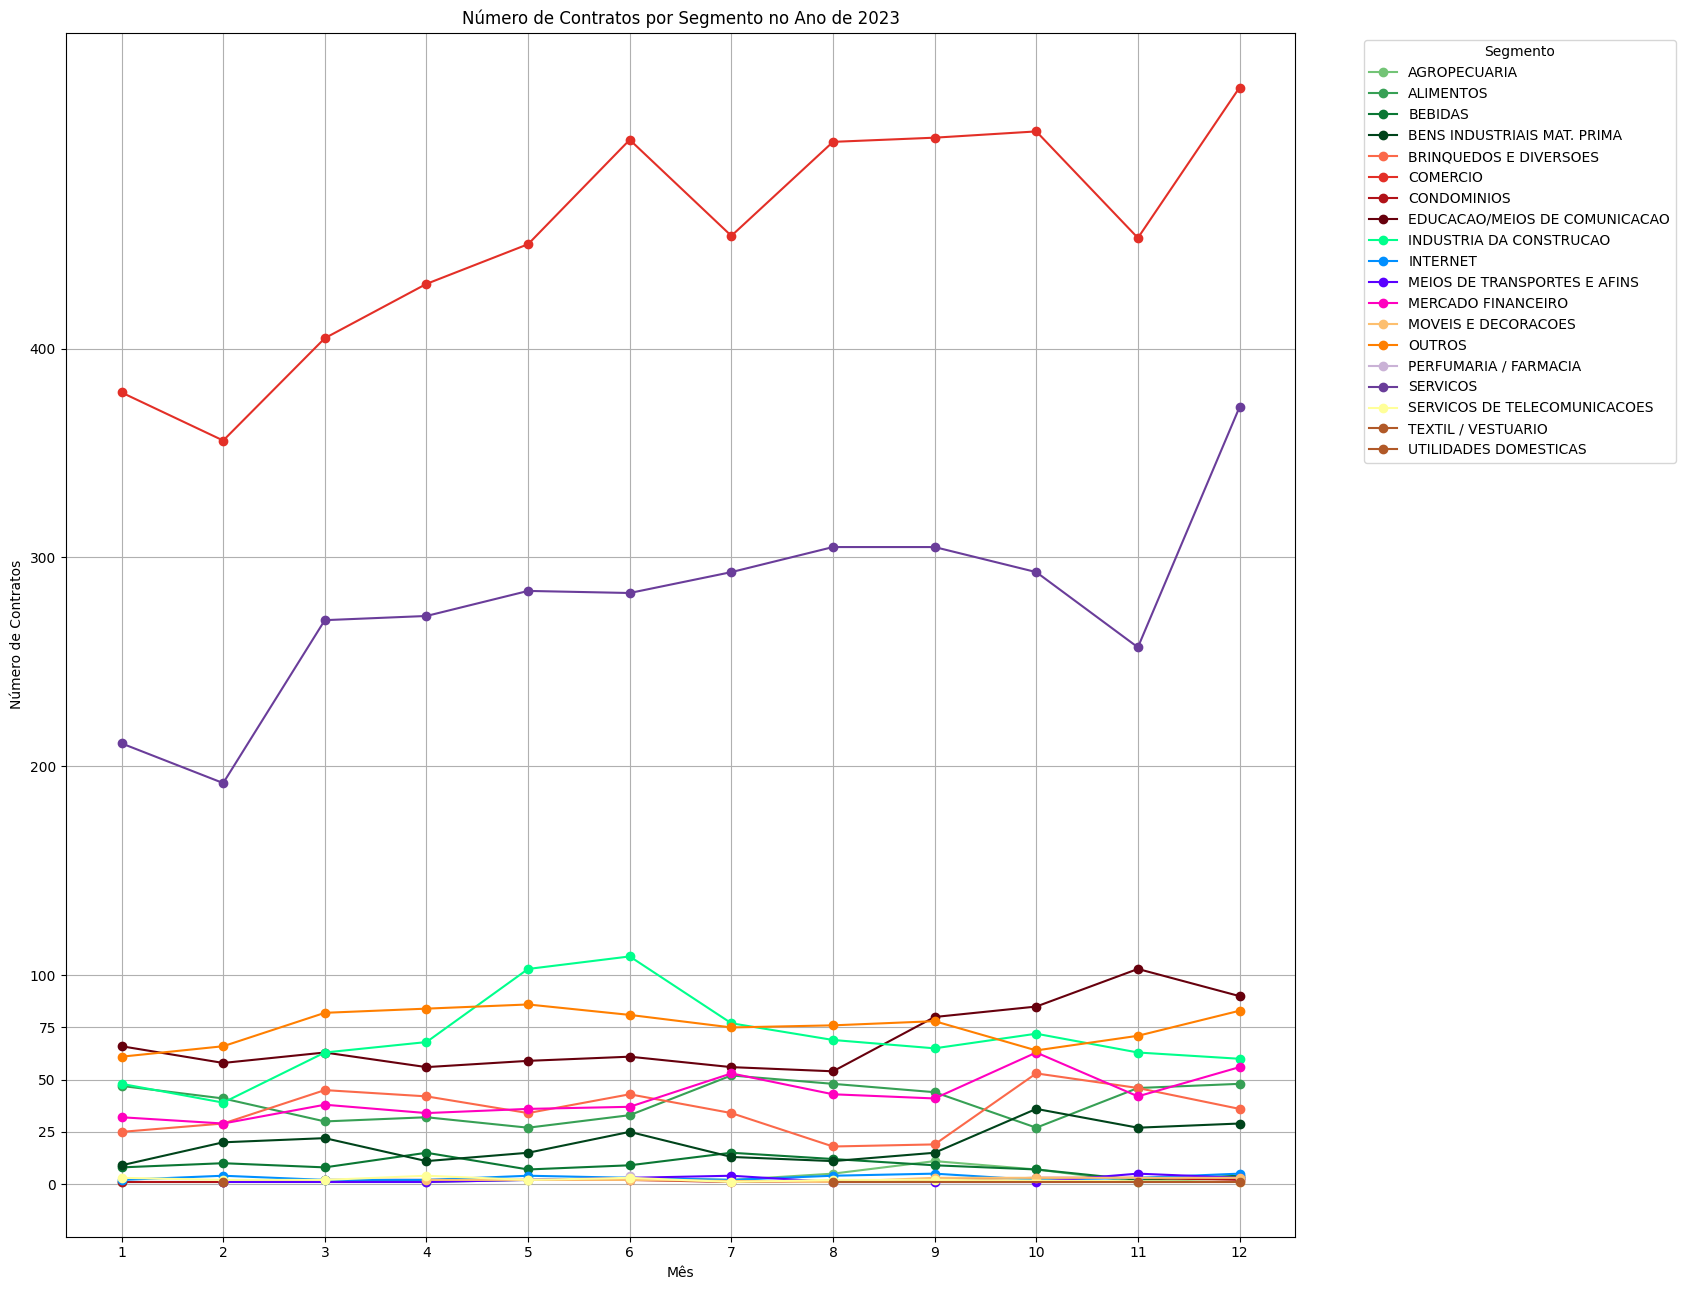

In [107]:
plt.figure(figsize=(17, 13))

for segmento, group in contratos_2023.groupby('Segmento'):
    plt.plot(
        group['Mês'],
        group['Número de Contratos'],
        marker='o',
        label=segmento,
        color=cores_segmentos[segmento]
    )

plt.title('Número de Contratos por Segmento no Ano de 2023')
plt.xlabel('Mês')
plt.ylabel('Número de Contratos')
plt.xticks(ticks=range(1, 13), labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.yticks([0, 25, 50, 75, 100, 200, 300, 400])
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Gráfico de volume de contratos por segmento em cada mês de 2024.

É criado um filtro no DataFrame que separa apenas as informações de 'Segmento' e 'Mês' do ano de 2024. Após isso, são unidos os dados referentes às informações citadas para possibilitar o uso do método .size() , que calcula a ocorrência dos segmentos em cada mês e depois, tudo é unido em um novo DF chamado "Número de Contratos".

In [108]:
df_2024 = df[df['Ano'] == 2024]
contratos_2024 = df_2024.groupby(['Segmento', 'Mês']).size().reset_index(name='Número de Contratos')

O DF é verificado para assegurar o funcionamento do filtro no ano de 2024.

In [109]:
df_2024.head()

,UEN,Veiculo,Cliente,Origem,Segmento,Setor,Ano,Mês,VL Tabela,Desconto R$,Desc %,Vl Bruto,Vl Liquido Final,IPCA ES,IPCA BR,% Ating. Meta,Taxa Ac. TRI % PIB,CONCATENAR
7,TELEVISÃO,TV GAZETA,DIRETA PROPAGANDA E EVENTOS LTDA,VT - CONTATO - VITÓRIA,SERVICOS,PREST DE SERVICOS,2024,6,18347.75,-9294.75,-0.507,9053.0,9053.0,0.05,0.21,0.875,NaN,62024VT - CONTATO - VITÓRIA
8,RÁDIO,LITORAL FM,MUNICIPIO DE VITORIA,VT - CONTATO - VITÓRIA,SERVICOS,SERVICOS PUBLICOS,2024,3,18944.20,0.00,0.000,18944.2,18944.2,0.05,0.16,0.706,"2,5",32024VT - CONTATO - VITÓRIA
13,RÁDIO,LITORAL FM,PICPAY INSTITUICAO DE PAGAMENTO S/A,RN - MERCADO NACIONAL,SERVICOS,PREST DE SERVICOS,2024,2,11300.00,-6723.50,-0.595,4576.5,4576.5,0.70,0.83,1.399,"2,5",22024RN - MERCADO NACIONAL
25,RÁDIO,CBN VITORIA,KURUMA VEICULOS S.A.,VT - CONTATO - VITÓRIA,COMERCIO,COMERC.P/ AUTOMOTIVO,2024,2,1592.00,-382.40,-0.240,1209.6,1209.6,0.70,0.83,1.013,"2,5",22024VT - CONTATO - VITÓRIA
29,RÁDIO,LITORAL FM NORTE,PETROLEO BRASILEIRO S.A.,RN - MERCADO NACIONAL,SERVICOS,PREST DE SERVICOS,2024,5,5184.00,-2312.80,-0.446,2871.2,2871.2,0.51,0.46,1.398,NaN,52024RN - MERCADO NACIONAL


Calcula o número de segmentos únicos no DataFrame e separa estes em quatro grupos para possibilitar a utilização de mais paletas de cores, facilitando a visualização do gráfico.

In [110]:
segmentos_unicos2024 = contratos_2024['Segmento'].unique()
num_segmentos2024 = len(segmentos_unicos2024)
separacao_cores = num_segmentos2024 // 4

Separa as cores de acordo com a divisão dos segmentos em paletas diferentes e atribui estas às linhas do gráfico.

In [111]:
cores_verde = plt.get_cmap('Greens')(np.linspace(0.5, 1, separacao_cores))
cores_vermelho = plt.get_cmap('Reds')(np.linspace(0.5, 1, separacao_cores))
cores_arcoiris = plt.get_cmap('gist_rainbow')(np.linspace(0.5, 1, separacao_cores))
cores_escuras = plt.get_cmap('Paired')(np.linspace(0.5, 1, num_segmentos2024 - 3 * separacao_cores))

cores_segmentos = {}
for i, segmento in enumerate(segmentos_unicos2024):
    if i < separacao_cores:
        cores_segmentos[segmento] = cores_verde[i]
    elif i < 2 * separacao_cores:
        cores_segmentos[segmento] = cores_vermelho[i - separacao_cores]
    elif i < 3 * separacao_cores:
        cores_segmentos[segmento] = cores_arcoiris[i - 2 * separacao_cores]
    else:
        cores_segmentos[segmento] = cores_escuras[i - 3 * separacao_cores]

Configura o tamanho do gráfico de linhas e as suas características, como suas cores, seus eixos, títulos e legendas. Por fim, o gráfico é gerado, demonstrando a quantidade de contratos assinados por segmentos em cada mês do ano de 2024 até junho, onde os dados deixam de aparecer.

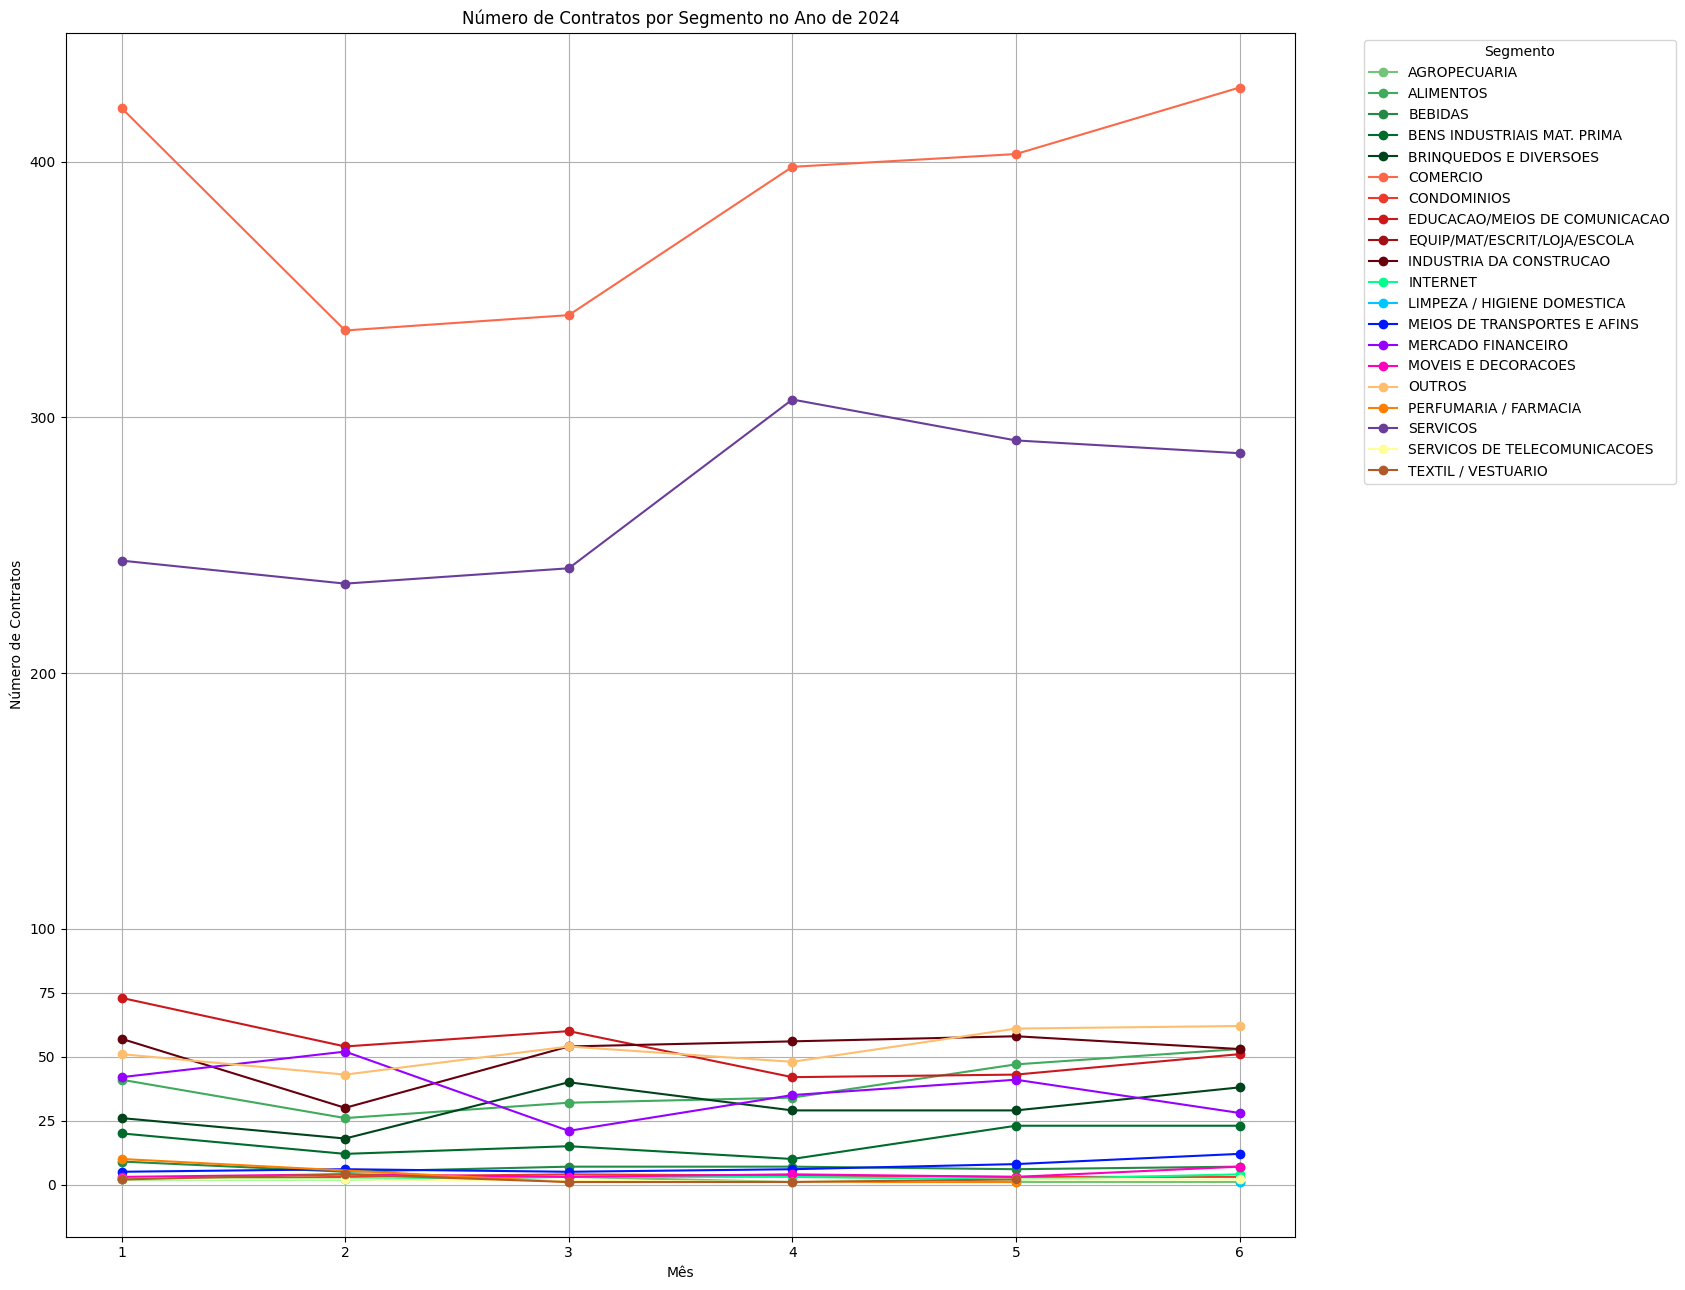

In [112]:
plt.figure(figsize=(17, 13))

for segmento, group in contratos_2024.groupby('Segmento'):
    plt.plot(
        group['Mês'],
        group['Número de Contratos'],
        marker='o',
        label=segmento,
        color=cores_segmentos[segmento]
    )

plt.title('Número de Contratos por Segmento no Ano de 2024')
plt.xlabel('Mês')
plt.ylabel('Número de Contratos')
plt.xticks(ticks=range(1, 7), labels=['1', '2', '3', '4', '5', '6'])
plt.yticks([0, 25, 50, 75, 100, 200, 300, 400])
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()